# Ayudantía 4: Ejercicio práctico SVM

## Ejercicio 1
Analizemos un poco el funcionamiento del algoritmom SVM.

In [ ]:
# Ejemplo tomado del libro "Python Data Science Handbook"
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC # "Support vector classifier"

# Librería para visualizaciones
import seaborn as sns; sns.set()

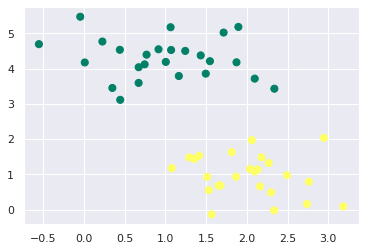

In [ ]:
# Primero creamos un set de datos aleatorios con make_blobs.
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer');

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # creamos un grid para evaluar el modelo
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # graficamos el margen y límites de decisión
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # graficamos los vectores de soporte
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

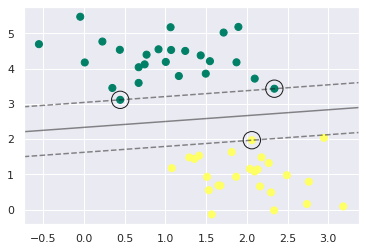

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(model);

In [ ]:
# obtenemos los valores de los vectores de soporte
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Support Vectors
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
Support Vectors
[[0.59009904 2.96974544]
 [2.33812285 3.43116792]
 [0.83685684 2.13635938]]


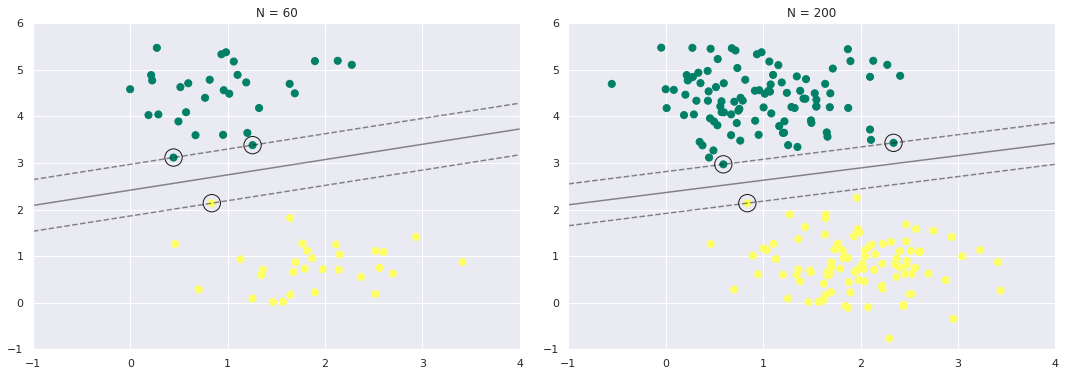

In [ ]:
# Ahora veremos que ocurre cuando aumentamos la cantidad de datos
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    print("Support Vectors")
    print(model.support_vectors_)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 200]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Ahora veremos un caso en el usamos SVM en 3 dimensiones.

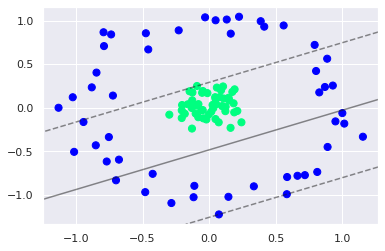

In [ ]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
# Aplicamos una funcion para llevar los datos a 3D
r = np.exp(-(X ** 2).sum(1))

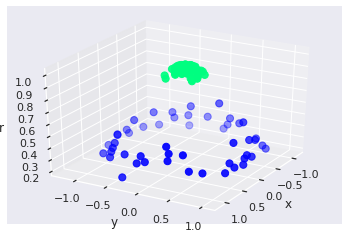

In [ ]:
from mpl_toolkits import mplot3d
# así es como se ve en 3D
# ahora si hay una linea que nos permita separar los puntos
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='winter')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D()

In [ ]:
clf = SVC(kernel='rbf', C=1E6, gamma='auto')
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

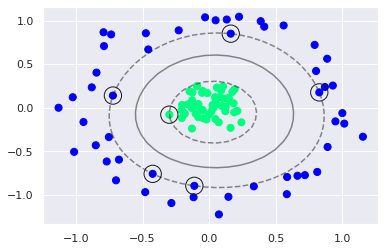

In [ ]:
# vemos finalmente la división del espacio y los vectores de soporte
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## Ejercicio 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
%matplotlib inline

Usaremos el *Iris flower dataset* de sklearn disponible en https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html. Este contiene muestras de las tres especies de Iris: Setosa, Virginica y Versicolor. Se midieron cuatro características el largo y ancho del pétalo y sépalo en centímetros

<img src='https://drive.google.com/uc?id=1N5IrjS5epl4e6nJt95-XB8YxpXizC2zz' width="20%">


In [ ]:
from sklearn.datasets import load_iris
iris  = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris['target'] = pd.DataFrame(iris.target)

In [ ]:
# Tenemos un DataFrame con 150 filas y 5 atributos
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Formamos los clusters de las clases
df0 = df_iris[df_iris.target == 0]
df1 = df_iris[df_iris.target == 1]
df2 = df_iris[df_iris.target == 2]

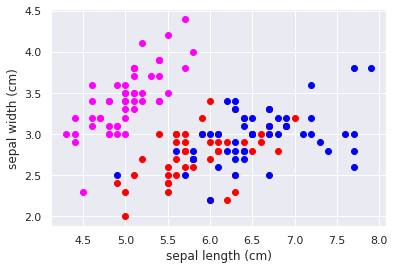

In [ ]:
# Los graficamos segun el largo del sépalo y el ancho del sépalo
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='magenta')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='blue')

In [ ]:
# Ahora formamos los datos para hacer el set de entrenamiento y test
X = df_iris.drop(['target'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = df_iris.target

In [ ]:
# El set de entrenamiento/testeo será 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Definimos el modelo
svm = SVC(kernel='linear')

# Entrenamos el modelo
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Hacemos las predicciones
predictions = svm.predict(X_test)
print(predictions)

[2 2 1 1 2 0 0 0 2 1 0 0 0 1 2 1 0 2 0 0 0 0 2 0 1 2 2 1 0 2]


In [ ]:
# Testeamos el modelo
percentage = svm.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

# Vemos el rendimiento del modelo
print(f"Accuracy = {percentage*100} %")

Accuracy = 96.66666666666667 %


Test Set: 30
Accuracy = 96.66666666666667 %


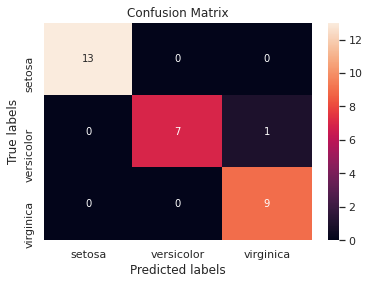

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 

# Etiquetas, título y categorías
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']); 
ax.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']);

print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

## Ejercicio 3

Código de https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-download-auto-examples-svm-plot-iris-svc-py

Más información de SVM: https://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

#### Funciones para graficar

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

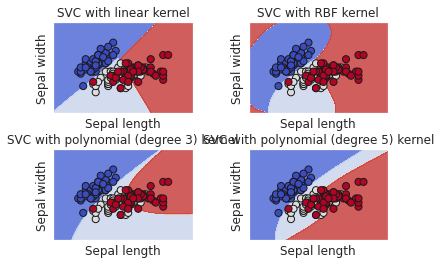

In [ ]:
# Escogemos dos características: largo y ancho del sépalo
X = df_iris[['sepal length (cm)', 'sepal width (cm)']]
y = df_iris.target


# Creamos las instancias de SVM
C = 1.0
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=5, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# Título de los gráficos
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with polynomial (degree 5) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0 = df_iris['sepal length (cm)']
X1 = df_iris['sepal width (cm)']
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()